In [5]:
import os
import numpy as np
import pickle
import math
import scipy as sp
from scipy import interpolate
from numpy.linalg import solve
import matplotlib.pyplot as plt
from skimage.measure import profile_line
from time import time
import spekpy
import skimage
import copy

from cil.io import NikonDataReader, RAWFileWriter, TIFFStackReader, TIFFWriter
from cil.utilities.jupyter import islicer
from cil.utilities.display import show_geometry, show2D
from cil.recon import FDK
from cil.plugins.tigre import FBP, ProjectionOperator
from cil.processors import TransmissionAbsorptionConverter, Slicer
from cil.optimisation.algorithms import CGLS, SIRT

from cil.optimisation.algorithms import GD, FISTA, PDHG
from cil.optimisation.operators import BlockOperator, GradientOperator,\
                                       GradientOperator
from cil.optimisation.functions import IndicatorBox, MixedL21Norm, L2NormSquared, \
                                       BlockFunction, L1Norm, LeastSquares, \
                                       OperatorCompositionFunction, TotalVariation, \
                                       ZeroFunction

from cil.io import NikonDataReader
from cil.utilities.jupyter import islicer
from cil.utilities.display import show_geometry, show2D, show1D

2D Cone-beam tomography
System configuration:
	Source position: [   0.        , -114.42489624]
	Rotation axis position: [0., 0.]
	Detector position: [  0.        , 997.32310376]
	Detector direction x: [1., 0.]
Panel configuration:
	Number of pixels: [2000    1]
	Pixel size: [0.2 0.2]
	Pixel origin: top-right
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 3142
	Angles 0-20 in degrees:
[-95.      , -95.11456 , -95.229126, -95.34369 , -95.45822 , -95.572784,
 -95.68735 , -95.80191 , -95.91647 , -96.03104 , -96.1456  , -96.26013 ,
 -96.374695, -96.48926 , -96.60382 , -96.71838 , -96.83295 , -96.94751 ,
 -97.06207 , -97.176605]
Distances in units: units distance
Number of channels: 1
channel_spacing: 1.0
voxel_num : x2000,y2000
voxel_size : x0.02058468218341459,y0.02058468218341459
center : x0,y0



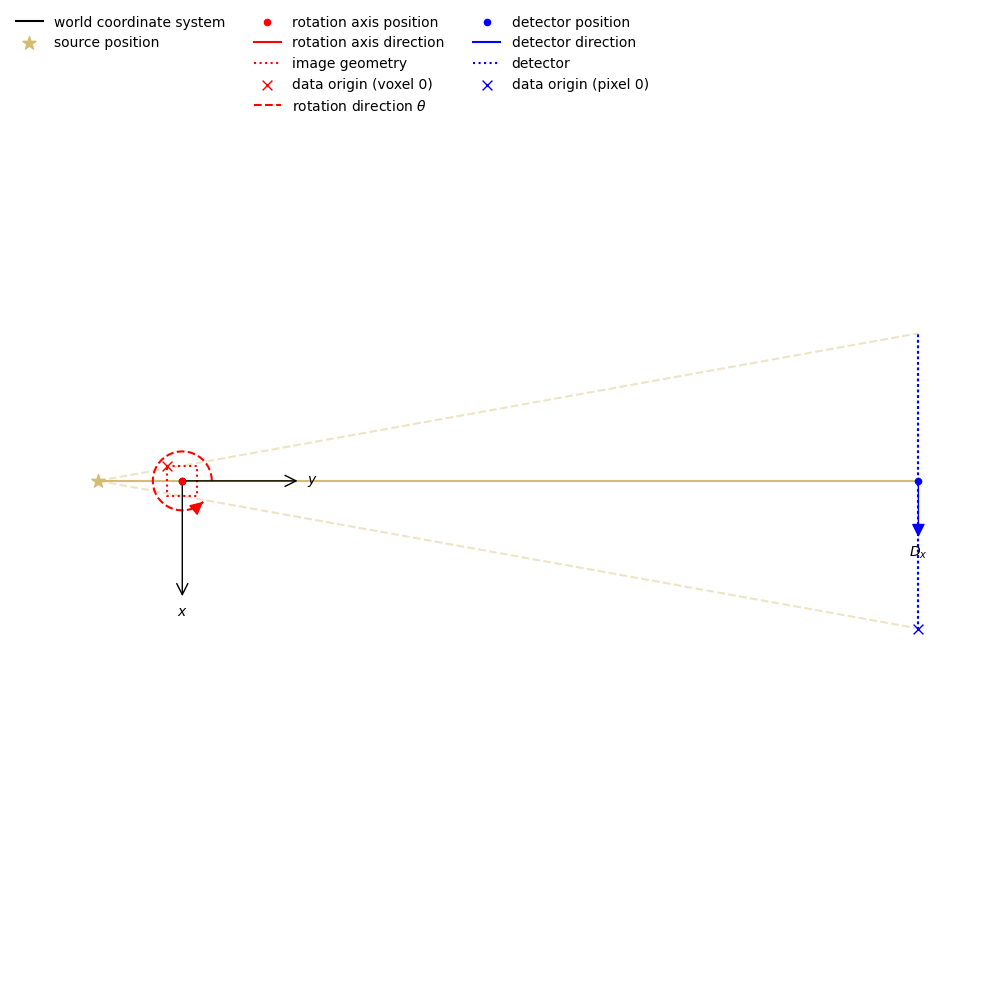

(0.034325, 1.02105)
(0.033617355, 1.0)
(-0.0, 3.3927128)


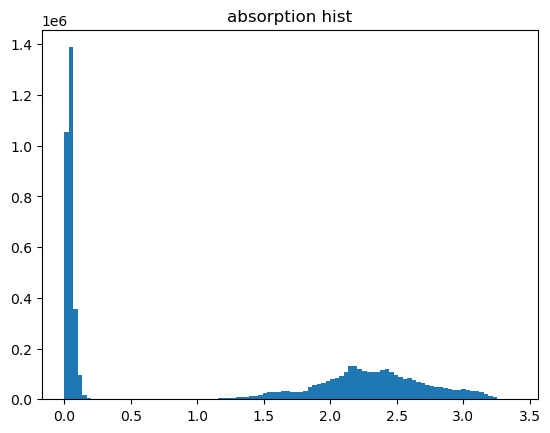

In [6]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')
file_path = os.path.join(base_dir,'centres/X16.pkl')
with open(file_path, 'rb') as file:
    data = pickle.load(file)

ag = data.geometry
ig = ag.get_ImageGeometry()
print(ag)
print(ig)
show_geometry(ag, ig)

print((data.min(),data.max()))
data /= data.max()
print((data.min(),data.max()))
data = TransmissionAbsorptionConverter()(data)
print((data.min(),data.max()))
plt.hist(data.as_array().flatten(),bins=100)
plt.title('absorption hist')
plt.show()

In [7]:
data.reorder('tigre')

In [8]:
print(data)

Number of dimensions: 2
Shape: (3142, 2000)
Axis labels: ('angle', 'horizontal')



In [9]:
ig = data.geometry.get_ImageGeometry()
fdk = FDK(data, ig)